In [195]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from sklearn.metrics import r2_score
import xgboost as xgb
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV
from random import randint
from sklearn.metrics import r2_score
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_uniform
import pickle
from sklearn.metrics import r2_score,mean_squared_error
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

# Data loading 

In [231]:
df=pd.read_csv('/content/drive/MyDrive/train_0OECtn8.csv',index_col='row_id')
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
row_id,,,,,,,,,
1,19990,37,128,24,Male,Student,180,1000,4.33
2,5304,32,132,14,Female,Student,330,714,1.79
3,1840,12,24,19,Male,Student,180,138,4.35
4,12597,23,112,19,Male,Student,220,613,3.77
5,13626,23,112,27,Male,Working Professional,220,613,3.13


In [232]:
df.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score
row_id,,,,,,,,,
1,19990,37,128,24,Male,Student,180,1000,4.33
2,5304,32,132,14,Female,Student,330,714,1.79
3,1840,12,24,19,Male,Student,180,138,4.35
4,12597,23,112,19,Male,Student,220,613,3.77
5,13626,23,112,27,Male,Working Professional,220,613,3.13


# Finding the information of the Dataset

In [198]:
df.shape

(89197, 9)

### There are total 89197 numbers of data point with 9 features present in the dataset

In [199]:
df.columns

Index(['user_id', 'category_id', 'video_id', 'age', 'gender', 'profession',
       'followers', 'views', 'engagement_score'],
      dtype='object')

In [200]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 89197 entries, 1 to 89197
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           89197 non-null  int64  
 1   category_id       89197 non-null  int64  
 2   video_id          89197 non-null  int64  
 3   age               89197 non-null  int64  
 4   gender            89197 non-null  object 
 5   profession        89197 non-null  object 
 6   followers         89197 non-null  int64  
 7   views             89197 non-null  int64  
 8   engagement_score  89197 non-null  float64
dtypes: float64(1), int64(6), object(2)
memory usage: 6.8+ MB


### Dataset have no null values

# EDA

**engagement_score**

In [201]:
df.engagement_score.describe()

count    89197.000000
mean         3.487797
std          0.863498
min          0.000000
25%          2.900000
50%          3.710000
75%          4.150000
max          5.000000
Name: engagement_score, dtype: float64



*   The mean value of engagement_score is 3.48 and the mean value of engagement_score 3.71.There is very less difference between mean and median ,so that we can conclude , there is no outlier in engagement_score




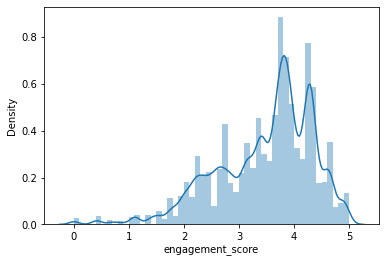

In [202]:
sns.distplot(df.engagement_score)
plt.show()

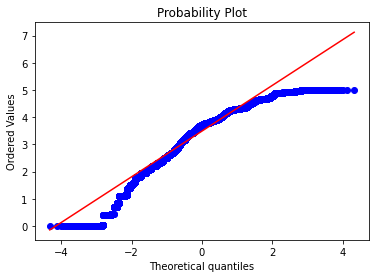

In [203]:
from scipy.stats import probplot
x,y = probplot(df.engagement_score,dist='norm',plot=plt)
plt.show()



*   The distribution is not normal distribution for engagement_score




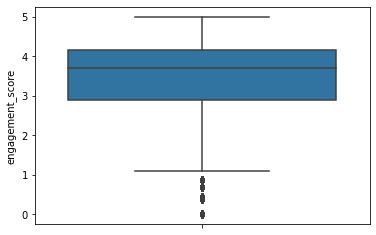

In [204]:
sns.boxplot(y=df.engagement_score)
plt.show()

In [205]:
(df[(df.engagement_score >= 1) & (df.engagement_score<=5)].shape[0]/df.shape[0])*100

99.08068657017613



*  Maximun Score are in the range of 1 to 5




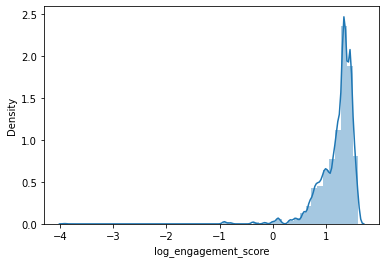

In [206]:
df['log_engagement_score'] = df.engagement_score.apply(lambda x: np.log(x) if x!=0 else x)
sns.distplot(df.log_engagement_score)
plt.show()



*   engagement_score distribution is also not log_normal distribution



In [207]:
df.drop(columns=['log_engagement_score'],inplace=True)

**views**

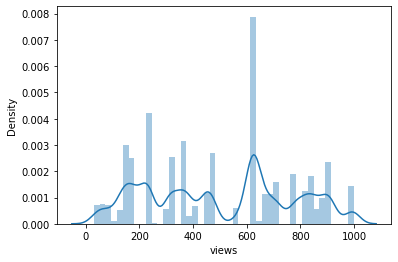

In [208]:
sns.distplot(df.views)
plt.show()

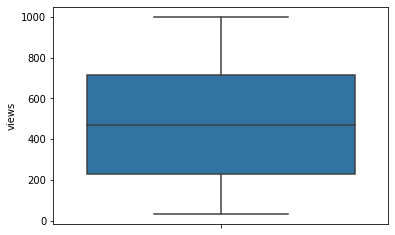

In [209]:
sns.boxplot(y = df.views)
plt.show()

**user_id**

In [210]:
df.user_id.value_counts()

5198     10
13218    10
1448     10
13410    10
7157     10
         ..
21507     2
4404      2
21430     2
17541     2
11279     2
Name: user_id, Length: 27734, dtype: int64

In [211]:
df1 = pd.DataFrame(df.groupby(by=['user_id'])['engagement_score'].mean().sort_values(ascending=False))
df1.reset_index(inplace=True)
df1.rename(columns={'engagement_score':'mean_engagement_score'},inplace=True)

df2 = pd.DataFrame(df.groupby(by=['user_id'])['video_id'].count().sort_values(ascending=False))
df2.reset_index(inplace=True)
df2.rename(columns={'video_id':'count_video_id'},inplace=True)

df3= df1.merge(df2,on=['user_id'])
df3.head()

,user_id,mean_engagement_score,count_video_id
0,26230,5.000000,2
1,16251,5.000000,2
2,193,5.000000,2
3,8353,5.000000,2
4,26737,4.993333,3


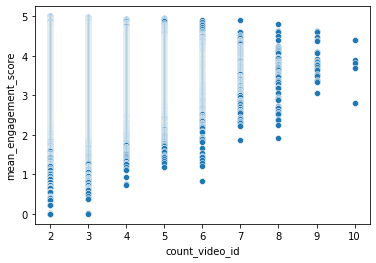

In [213]:
sns.scatterplot(df3.count_video_id,df3.mean_engagement_score)
plt.show()

In [214]:
df.groupby(by = ['user_id','video_id'])['engagement_score'].median()

user_id  video_id
1        1           2.88
         2           3.66
         3           2.88
2        4           3.65
         5           3.50
                     ... 
27733    16          3.43
         49          1.95
         110         2.30
27734    46          3.98
         121         4.29
Name: engagement_score, Length: 89197, dtype: float64

**category_id**

In [215]:
len(df.category_id.unique())

47

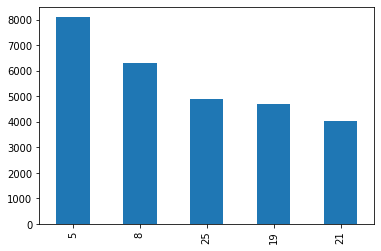

In [216]:
df.category_id.value_counts().sort_values(ascending=False).head().plot(kind='bar')
plt.show()

   category_id  engagement_score
0           43          4.043435
1           23          3.955189
2            9          3.950270
3           36          3.896859
4           35          3.857667


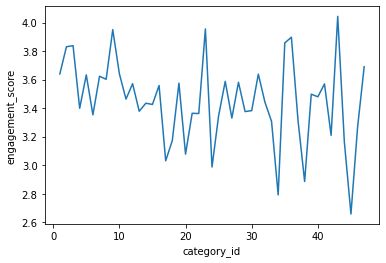

In [217]:
df_cat = pd.DataFrame(df.groupby('category_id')['engagement_score'].mean().sort_values(ascending=False))
df_cat.reset_index(inplace=True)
print(df_cat.head())

sns.lineplot(df_cat.category_id,df_cat.engagement_score)
plt.show()

In [218]:
df.groupby('category_id')['video_id'].count().sort_values(ascending=False).head()

category_id
5     8104
8     6313
25    4880
19    4679
21    4043
Name: video_id, dtype: int64

**views**

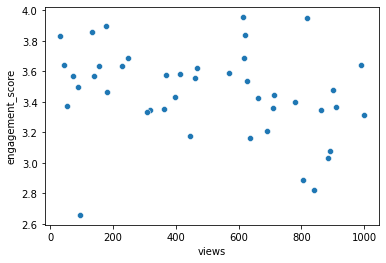

In [219]:
df_views= pd.DataFrame(df.groupby(by='views')['engagement_score'].mean().sort_values(ascending=False))
df_views.reset_index(inplace=True)
df_views.sort_values(by = 'views',ascending=False)

sns.scatterplot(df_views.views,df_views.engagement_score)
plt.show()

**followers**

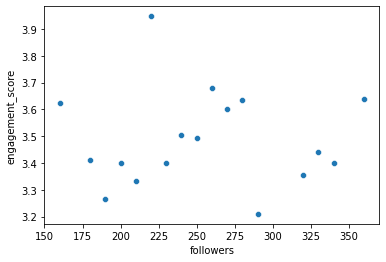

In [220]:
df_followers= pd.DataFrame(df.groupby(by='followers')['engagement_score'].mean().sort_values(ascending=False))
df_followers.reset_index(inplace=True)
df_followers.sort_values(by = 'followers',ascending=False)

sns.scatterplot(df_followers.followers,df_followers.engagement_score)
plt.show()

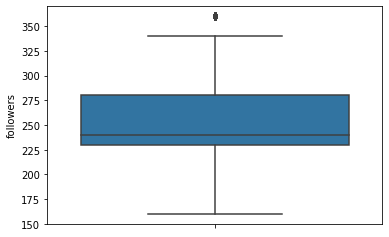

In [221]:
sns.boxplot(y = df.followers)
plt.show()

**profession**

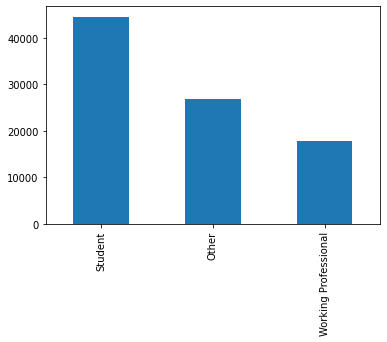

In [222]:
df.profession.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

profession
Student                 3.737970
Other                   3.329757
Working Professional    3.096949
Name: engagement_score, dtype: float64


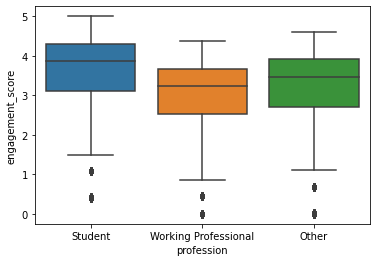

In [223]:
print(df.groupby(by='profession')['engagement_score'].mean().sort_values(ascending=False))

sns.boxplot(df.profession,df.engagement_score)
plt.show()

**age**

In [224]:
df.age.describe()

count    89197.000000
mean        24.848616
std          8.955535
min         10.000000
25%         18.000000
50%         23.000000
75%         32.000000
max         68.000000
Name: age, dtype: float64

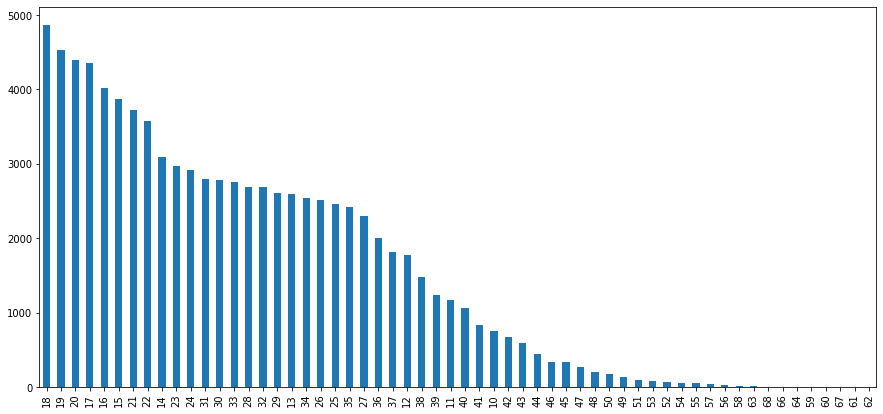

In [225]:
plt.figure(figsize=(15,7))
df.age.value_counts().sort_values(ascending=False).plot(kind='bar')
plt.show()

**gender**

In [228]:
df.gender.value_counts()

Male      52397
Female    36800
Name: gender, dtype: int64

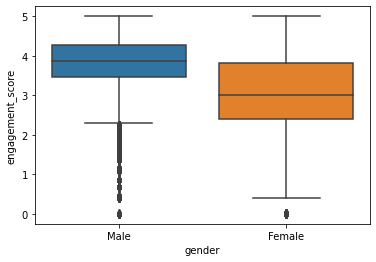

In [229]:
sns.boxplot(df.gender,df.engagement_score)
plt.show()

#  **Data preprocess : Train Data**

### Add a new feature 'view_followers_ratio'

In [233]:
df['view_followers_ratio'] = df.views/df.followers

### Devide the feature 'eng_score_bracket' in to 5 brackets (1,2,3,4,5)

In [238]:
def Transform(x):
  if x>=0 and x<=1:
    return '1'
  elif x>1 and x<=2:
    return '2'
  elif x>2 and x<=3:
    return '3'
  elif x>3 and x<=4:
    return '4'
  else:
    return '5'

In [239]:
df['eng_score_bracket'] = df.engagement_score.apply(lambda x: Transform(x))

### Creat a new dataframe named 'driver'

In [240]:
driver = df.copy()

In [241]:
driver.head()

,user_id,category_id,video_id,age,gender,profession,followers,views,engagement_score,view_followers_ratio,eng_score_bracket
row_id,,,,,,,,,,,
1,19990,37,128,24,Male,Student,180,1000,4.33,5.555556,5
2,5304,32,132,14,Female,Student,330,714,1.79,2.163636,2
3,1840,12,24,19,Male,Student,180,138,4.35,0.766667,5
4,12597,23,112,19,Male,Student,220,613,3.77,2.786364,4
5,13626,23,112,27,Male,Working Professional,220,613,3.13,2.786364,4


### Delete the unnecessary columns

In [242]:
driver.drop(columns = ['age','gender','profession','followers','views'],inplace=True)
driver.head()

,user_id,category_id,video_id,engagement_score,view_followers_ratio,eng_score_bracket
row_id,,,,,,
1,19990,37,128,4.33,5.555556,5
2,5304,32,132,1.79,2.163636,2
3,1840,12,24,4.35,0.766667,5
4,12597,23,112,3.77,2.786364,4
5,13626,23,112,3.13,2.786364,4


### Creat a age bracket and divide the age feture as per age bracket

In [243]:
def agebracketcalc(x):
  if x > 0 and x<= 18:
    return '0-18'
  elif x>18 and x <= 28:
    return '18-28'
  elif x > 28 and x<= 38:
    return '28-38'
  elif x> 38 and x<= 48:
    return '38-48'
  else:
    return '48+'

In [244]:
df['age_bracket'] = df.age.apply(lambda x: agebracketcalc(x))

In [245]:
df['view_followers_ratio'] = df.views/df.followers

# **Data preprocess : Test Data**

In [246]:
df_test = pd.read_csv('/content/drive/MyDrive/test_1zqHu22.csv',index_col='row_id')
df_test.head()

,user_id,category_id,video_id,age,gender,profession,followers,views
row_id,,,,,,,,
89198,7986,12,42,14,Male,Student,180,138
89199,11278,34,115,14,Male,Student,230,840
89200,17245,8,110,44,Female,Working Professional,280,628
89201,9851,16,137,18,Male,Student,270,462
89202,16008,34,96,47,Female,Other,230,840


In [247]:
df_test['age_bracket'] = df_test.age.apply(lambda x: agebracketcalc(x))

In [248]:
df_test['view_followers_ratio'] = df_test.views/df_test.followers

In [249]:
df_test.drop(columns=['age'],inplace=True)

In [250]:
df_test.head()

,user_id,category_id,video_id,gender,profession,followers,views,age_bracket,view_followers_ratio
row_id,,,,,,,,,
89198,7986,12,42,Male,Student,180,138,0-18,0.766667
89199,11278,34,115,Male,Student,230,840,0-18,3.652174
89200,17245,8,110,Female,Working Professional,280,628,38-48,2.242857
89201,9851,16,137,Male,Student,270,462,0-18,1.711111
89202,16008,34,96,Female,Other,230,840,38-48,3.652174


# **Spliting Data**

In [251]:
y=df['engagement_score']
X=df.drop('engagement_score',axis=1)

In [252]:
X_tr,X_te,y_tr,y_te=train_test_split(X, y, test_size=0.20,random_state=100)

In [253]:
df1 = X_tr[X_tr.eng_score_bracket == '1']
df2 = X_tr[X_tr.eng_score_bracket == '2']
df3 = X_tr[X_tr.eng_score_bracket == '3']
df4 = X_tr[X_tr.eng_score_bracket == '4']
df5 = X_tr[X_tr.eng_score_bracket == '5']

In [254]:
def preprocess(tr,val,test,sample_test,feature):
  from sklearn.feature_extraction.text import CountVectorizer
  vectorizer = CountVectorizer()
  if tr[feature].dtype == 'int64':
    #tr[feature] = tr[feature].astype('str')
    #val[feature] = val[feature].astype('str')
    tr[feature] = tr[feature].astype('str').apply(lambda x: '0'+x if len(x) == 1 else x)
    val[feature] = val[feature].astype('str').apply(lambda x: '0'+x if len(x) == 1 else x)
    test[feature] = test[feature].astype('str').apply(lambda x: '0'+x if len(x) == 1 else x)
    sample_test[feature] = sample_test[feature].astype('str').apply(lambda x: '0'+x if len(x) == 1 else x)

  pre_feature_tr = vectorizer.fit_transform(tr[feature].values)
  pre_feature_val = vectorizer.transform(val[feature].values)
  pre_feature_test = vectorizer.transform(test[feature].values)
  pre_feature_sample_test = vectorizer.transform(sample_test[feature].values)

  return pre_feature_tr,pre_feature_val,pre_feature_test,pre_feature_sample_test

In [255]:
def data_preprocess(data,X_te,df_test):

  data.drop(columns=['eng_score_bracket','user_id','video_id','age'],inplace=True)
  y=y_tr[data.index]
  X=data
  X_tr,X_val,Y_tr,Y_val=train_test_split(X, y, test_size=0.20,random_state=100)

  #data Preproces
  x_tr_cat_preprocess,x_val_cat_preprocess,x_te_cat_preprocess,x_sample_test_cat_preprocess = \
          preprocess(X_tr,X_val,X_te,df_test,'category_id')
  x_tr_gender_preprocess,x_val_gender_preprocess,x_te_gender_preprocess,x_sample_test_gender_preprocess = \
          preprocess(X_tr,X_val,X_te,df_test,'gender')
  x_tr_profession_preprocess,x_val_profession_preprocess,x_te_profession_preprocess,x_sample_test_profession_preprocess = \
              preprocess(X_tr,X_val,X_te,df_test,'profession')
  x_tr_age_preprocess,x_val_age_preprocess,x_te_age_preprocess,x_sample_test_age_preprocess = \
              preprocess(X_tr,X_val,X_te,df_test,'age_bracket')
  x_tr_views_preprocess,x_val_views_preprocess,x_te_views_preprocess,x_sample_test_views_preprocess = \
              preprocess(X_tr,X_val,X_te,df_test,'views')
  x_tr_followers_preprocess,x_val_followers_preprocess,x_te_followers_preprocess,x_sample_test_followers_preprocess = \
              preprocess(X_tr,X_val,X_te,df_test,'followers')

  x_tr_preprocess = hstack((x_tr_cat_preprocess,x_tr_gender_preprocess,x_tr_profession_preprocess,x_tr_age_preprocess,\
                            #X_tr['followers'].values.reshape(-1,1),X_tr['views'].values.reshape(-1,1),\
                            x_tr_views_preprocess,x_tr_followers_preprocess,
                            X_tr['view_followers_ratio'].values.reshape(-1,1))).tocsr()
  x_val_preprocess = hstack((x_val_cat_preprocess,x_val_gender_preprocess,x_val_profession_preprocess,x_val_age_preprocess,\
                            #X_val['followers'].values.reshape(-1,1),X_val['views'].values.reshape(-1,1),\
                            x_val_views_preprocess,x_val_followers_preprocess,
                            X_val['view_followers_ratio'].values.reshape(-1,1))).tocsr()

  x_test_preprocess = hstack((x_te_cat_preprocess,x_te_gender_preprocess,x_te_profession_preprocess,x_te_age_preprocess,\
                            #X_val['followers'].values.reshape(-1,1),X_val['views'].values.reshape(-1,1),\
                            x_te_views_preprocess,x_te_followers_preprocess,
                            X_te['view_followers_ratio'].values.reshape(-1,1))).tocsr()

  x_sample_test_preprocess = hstack((x_sample_test_cat_preprocess,x_sample_test_gender_preprocess,\
                                      x_sample_test_profession_preprocess,x_sample_test_age_preprocess,\
                            #X_val['followers'].values.reshape(-1,1),X_val['views'].values.reshape(-1,1),\
                            x_sample_test_views_preprocess,x_sample_test_followers_preprocess,
                            df_test['view_followers_ratio'].values.reshape(-1,1))).tocsr()

  #print(x_tr_preprocess.shape,x_val_preprocess.shape,x_test_preprocess.shape)
  return x_tr_preprocess,x_val_preprocess,x_test_preprocess,x_sample_test_preprocess,Y_tr,Y_val


In [256]:
x_tr_preprocess_1,x_val_preprocess_1,x_test_preprocess_1,x_sample_test_preprocess_1,Y_tr_1,Y_val_1 = \
          data_preprocess(df1,X_te,df_test)
x_tr_preprocess_2,x_val_preprocess_2,x_test_preprocess_2,x_sample_test_preprocess_2,Y_tr_2,Y_val_2 = \
          data_preprocess(df2,X_te,df_test)
x_tr_preprocess_3,x_val_preprocess_3,x_test_preprocess_3,x_sample_test_preprocess_3,Y_tr_3,Y_val_3 = \
          data_preprocess(df3,X_te,df_test)
x_tr_preprocess_4,x_val_preprocess_4,x_test_preprocess_4,x_sample_test_preprocess_4,Y_tr_4,Y_val_4 = \
          data_preprocess(df4,X_te,df_test)
x_tr_preprocess_5,x_val_preprocess_5,x_test_preprocess_5,x_sample_test_preprocess_5,Y_tr_5,Y_val_5 = \
          data_preprocess(df5,X_te,df_test)

In [257]:
x_test_preprocess_1.shape,x_test_preprocess_2.shape,x_test_preprocess_3.shape,\
x_test_preprocess_4.shape,x_test_preprocess_5.shape

((17840, 110), (17840, 116), (17840, 118), (17840, 118), (17840, 118))

In [258]:
x_sample_test_preprocess_1.shape,x_sample_test_preprocess_2.shape,\
x_sample_test_preprocess_3.shape,x_sample_test_preprocess_4.shape,x_sample_test_preprocess_5.shape

((11121, 110), (11121, 116), (11121, 118), (11121, 118), (11121, 118))

# **Model**

In [ ]:
def modelprediction(x_tr_preprocess,y_tr,x_val_preprocess,y_val,i):
  parameters = {'alpha':[0.001,0.1,1, 10,100],'l1_ratio':[0.001,0.01,.1, 1]}
  model = ElasticNet(random_state=10)

  elastic_reg= RandomizedSearchCV(model, parameters, scoring='r2',cv=5)

  #fit the grid search
  elastic_reg.fit(x_tr_preprocess,y_tr)
  print(elastic_reg.best_params_)

  # best estimator
  clf = ElasticNet(alpha=elastic_reg.best_params_['alpha'],l1_ratio=elastic_reg.best_params_['l1_ratio'],random_state=10)
  clf.fit(x_tr_preprocess, y_tr)
  y_pred = clf.predict(x_val_preprocess)
  #print(y_pred.round(2))
  #print(y_val.values)
  #filename = 'finalized_model_'+str(i)+'.pkl'
  #pickle.dump(clf, open(filename, 'wb'))

  return pow(mean_squared_error(y_val.values,y_pred.round(2)),.5)

In [ ]:
def modelprediction(x_tr_preprocess,y_tr,x_val_preprocess,y_val,i):
  parameters = {'n_neighbors':[i for i in range(1,11)]}
  model = KNeighborsRegressor(weights = 'distance')

  knn_reg= RandomizedSearchCV(model, parameters, scoring='r2',cv=5)

  #fit the grid search
  knn_reg.fit(x_tr_preprocess,y_tr)
  print(knn_reg.best_params_)

  # best estimator
  clf = KNeighborsRegressor(n_neighbors=knn_reg.best_params_['n_neighbors'],weights = 'distance')
  clf.fit(x_tr_preprocess, y_tr)
  y_pred = clf.predict(x_val_preprocess)
  #print(y_pred.round(2))
  #print(y_val.values)
  #filename = 'finalized_model_'+str(i)+'.pkl'
  #pickle.dump(clf, open(filename, 'wb'))

  return pow(mean_squared_error(y_val.values,y_pred.round(2)),.5)

In [ ]:
def modelprediction(x_tr_preprocess,y_tr,x_val_preprocess,y_val,i):
  parameters = {"max_depth": [i*10 for i in range(1,11)],
                "max_features": [i for i in range(1,100)],
                "min_samples_leaf": [i for i in range(1,100)]}
  model = DecisionTreeRegressor()

  decision_tree = RandomizedSearchCV(model, parameters, scoring='r2',cv=5)

  #fit the grid search
  decision_tree.fit(x_tr_preprocess,y_tr)
  print(decision_tree.best_params_)

  # best estimator
  clf = DecisionTreeRegressor(max_depth=decision_tree.best_params_['max_depth'],
                              max_features=decision_tree.best_params_['max_features'],
                              min_samples_leaf=decision_tree.best_params_['min_samples_leaf'])
  clf.fit(x_tr_preprocess, y_tr)
  y_pred = clf.predict(x_val_preprocess)
  y_train_pred = clf.predict(x_tr_preprocess)

  #filename = 'finalized_model_'+str(i)+'.pkl'
  #pickle.dump(clf, open(filename, 'wb'))

  return pow(mean_squared_error(y_val.values,y_pred.round(2)),.5)

# **Final Model**

In [259]:
def modelprediction(x_tr_preprocess,y_tr,x_val_preprocess,y_val,i):
  param_test ={'num_leaves': sp_randint(6, 50), 
              'min_child_samples': sp_randint(100, 500), 
              'min_child_weight': [1e-5, 1e-3, 1e-2, 1e-1, 1, 1e1, 1e2, 1e3, 1e4],
              'subsample': sp_uniform(loc=0.2, scale=0.8), 
              'colsample_bytree': sp_uniform(loc=0.4, scale=0.6),
              'reg_alpha': [0, 1e-1, 1, 2, 5, 7, 10, 50, 100],
              'reg_lambda': [0, 1e-1, 1, 5, 10, 20, 50, 100]}
  model = lgb.LGBMRegressor(n_jobs =-1,random_state=314)

  xgbre = RandomizedSearchCV(model, param_test,scoring='r2',cv=5, refit=True,random_state=314,verbose=True)

  #fit the grid search
  xgbre.fit(x_tr_preprocess,y_tr)
  print(xgbre.best_params_)

  # best estimator
  clf = lgb.LGBMRegressor(num_leaves=xgbre.best_params_['num_leaves'],
                              min_child_samples=xgbre.best_params_['min_child_samples'],
                          min_child_weight=xgbre.best_params_['min_child_weight'],
                          subsample=xgbre.best_params_['subsample'],
                          colsample_bytree=xgbre.best_params_['colsample_bytree'],
                          reg_alpha=xgbre.best_params_['reg_alpha'],
                              reg_lambda=xgbre.best_params_['reg_lambda'])
  clf.fit(x_tr_preprocess, y_tr)
  y_pred = clf.predict(x_val_preprocess)
  y_train_pred = clf.predict(x_tr_preprocess)

  filename = 'finalized_model_'+str(i)+'.pkl'
  pickle.dump(clf, open(filename, 'wb'))

  return pow(mean_squared_error(y_val.values,y_pred.round(2)),.5)


In [260]:
print('RMSE for df1: {}'.format(modelprediction(x_tr_preprocess_1,Y_tr_1,x_val_preprocess_1,Y_val_1,1)))
print('RMSE for df2: {}'.format(modelprediction(x_tr_preprocess_2,Y_tr_2,x_val_preprocess_2,Y_val_2,2)))
print('RMSE for df3: {}'.format(modelprediction(x_tr_preprocess_3,Y_tr_3,x_val_preprocess_3,Y_val_3,3)))
print('RMSE for df4: {}'.format(modelprediction(x_tr_preprocess_4,Y_tr_4,x_val_preprocess_4,Y_val_4,4)))
print('RMSE for df5: {}'.format(modelprediction(x_tr_preprocess_5,Y_tr_5,x_val_preprocess_5,Y_val_5,5)))

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'colsample_bytree': 0.55607546409401, 'min_child_samples': 103, 'min_child_weight': 10.0, 'num_leaves': 22, 'reg_alpha': 2, 'reg_lambda': 1, 'subsample': 0.8939112927620336}
RMSE for df1: 0.3031947685385962
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'colsample_bytree': 0.8754369812451743, 'min_child_samples': 372, 'min_child_weight': 10.0, 'num_leaves': 44, 'reg_alpha': 1, 'reg_lambda': 0, 'subsample': 0.568664015245299}
RMSE for df2: 0.2772699514087281
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'colsample_bytree': 0.6879091728281055, 'min_child_samples': 163, 'min_child_weight': 10.0, 'num_leaves': 10, 'reg_alpha': 1, 'reg_lambda': 0.1, 'subsample': 0.6775057521029393}
RMSE for df3: 0.25160914983079175
Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'colsample_bytree': 0.55607546409401, 'min_child_samples': 103, 'min_child_weight': 10.0, 'num_leaves': 22, 'reg_alpha': 2, '

# **Final Model Evaluation**

In [261]:
X_te.drop(columns=['eng_score_bracket','age'],inplace=True)
X_te.head()

,user_id,category_id,video_id,gender,profession,followers,views,view_followers_ratio,age_bracket
row_id,,,,,,,,,
64746,21380,12,24,Female,Student,180,138,0.766667,0-18
79008,1821,05,10,Male,Student,240,229,0.954167,0-18
2666,14103,19,164,Male,Student,230,369,1.604348,18-28
79354,7483,12,162,Female,Student,180,138,0.766667,18-28
13431,18811,15,33,Male,Student,340,662,1.947059,0-18


In [262]:
X_te.head()

,user_id,category_id,video_id,gender,profession,followers,views,view_followers_ratio,age_bracket
row_id,,,,,,,,,
64746,21380,12,24,Female,Student,180,138,0.766667,0-18
79008,1821,05,10,Male,Student,240,229,0.954167,0-18
2666,14103,19,164,Male,Student,230,369,1.604348,18-28
79354,7483,12,162,Female,Student,180,138,0.766667,18-28
13431,18811,15,33,Male,Student,340,662,1.947059,0-18


In [263]:
from tqdm import tqdm
def Predict(TestData,TestDataPre1,TestDataPre2,TestDataPre3,TestDataPre4,TestDataPre5):
  y_pred = list()
  for idx,testdata in tqdm(enumerate(TestData.iterrows())):
      temp = list()
      user_id = testdata[1].user_id
      video_id = testdata[1].video_id
      category_id = testdata[1].category_id
      #print(user_id,video_id,category_id)
      pred_model_route = {'1':1,'2':2,'3':3,'4':4,'5':5}
      pre_data = {'1':TestDataPre1,'2':TestDataPre2,'3':TestDataPre3,\
      '4':TestDataPre4,'5':TestDataPre5}

      if driver[(driver.user_id == int(user_id)) & (driver.video_id == int(video_id))]\
        .eng_score_bracket.values.shape[0] != 0:
        drive = driver[((driver.user_id == int(user_id)) & (driver.video_id == int(video_id)))]\
        .eng_score_bracket.item()
      elif driver[(driver.user_id == int(user_id)) & (driver.category_id == int(category_id))].\
          eng_score_bracket.values.shape[0] != 0:
        data = driver[(driver.user_id == int(user_id)) & (driver.category_id == int(category_id))].\
                engagement_score.max()
        drive = Transform(data)
      else:
        if driver[(driver.user_id == int(user_id))].eng_score_bracket.values.shape[0] != 0:
          data = driver[driver.user_id == int(user_id)].engagement_score.max()
          drive = Transform(data)
        else:
          data = driver[(driver.category_id == int(category_id))].engagement_score.max()
          drive = Transform(data)
      
      if pred_model_route.get(drive) != None:
        filename = 'finalized_model_'+drive+'.pkl'
        model = pickle.load(open(filename, 'rb'))
        preprocessfile = pre_data[drive]
        temp.append([testdata[0],round(model.predict(preprocessfile[idx])[0],2)])

      y_pred.append(temp[0])
  return y_pred

In [264]:
print('Predicted Value')
print('='*30)
y_pred = Predict(X_te,x_test_preprocess_1,x_test_preprocess_2,x_test_preprocess_3,x_test_preprocess_4,\
                 x_test_preprocess_5)
pred_value = list()
for idx in range(len(y_pred)):
  pred_value.append(y_pred[idx][1])
print(pred_value)

Predicted Value


17840it [04:47, 61.95it/s]

[3.51, 4.48, 4.36, 2.73, 4.36, 2.42, 2.64, 4.37, 2.64, 3.38, 3.78, 2.69, 4.34, 4.39, 2.35, 3.46, 2.67, 3.47, 2.62, 4.26, 3.5, 1.7, 1.48, 3.58, 4.37, 3.78, 3.47, 3.45, 4.24, 3.65, 4.38, 3.77, 3.58, 3.64, 2.72, 2.34, 4.49, 4.25, 0.5, 4.39, 3.46, 4.55, 1.52, 2.54, 1.51, 4.34, 3.64, 2.36, 4.38, 3.68, 4.37, 3.47, 3.64, 1.51, 2.34, 4.36, 4.45, 4.39, 2.36, 3.42, 1.72, 4.59, 2.65, 3.65, 2.66, 1.71, 3.45, 3.75, 1.52, 3.48, 1.48, 3.7, 3.75, 4.39, 3.66, 3.4, 3.61, 3.61, 4.48, 3.57, 3.64, 3.64, 4.39, 3.78, 4.34, 3.58, 3.65, 3.67, 3.65, 4.25, 3.78, 3.67, 4.45, 2.65, 3.45, 3.66, 4.34, 4.39, 4.34, 4.12, 4.38, 3.62, 2.65, 3.66, 3.64, 3.65, 3.73, 4.29, 4.34, 2.72, 2.4, 2.61, 3.62, 3.78, 3.44, 3.77, 1.64, 3.78, 3.46, 3.78, 3.54, 3.62, 4.32, 2.65, 2.58, 3.58, 3.7, 1.73, 2.53, 4.39, 1.54, 2.44, 2.57, 1.64, 2.34, 4.28, 3.65, 2.57, 4.48, 2.3, 3.77, 3.43, 2.62, 3.78, 3.65, 3.63, 4.39, 1.7, 2.7, 3.63, 3.73, 4.24, 3.78, 3.46, 2.65, 3.63, 3.4, 3.5, 3.78, 3.54, 4.43, 4.39, 3.62, 4.34, 2.66, 2.61, 4.55, 2.38, 3.6

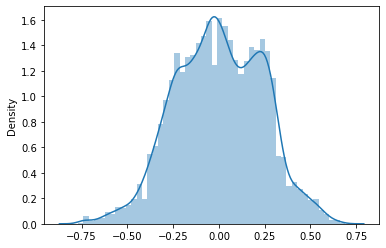

In [265]:
error = y_te.values - pred_value
sns.distplot(error)
plt.show()

In [266]:
from sklearn.metrics import r2_score
print(r2_score(y_te.values,pred_value,multioutput='variance_weighted'))

0.9228010976264103


**Sample Test Submission**

In [267]:
df_test.head()

,user_id,category_id,video_id,gender,profession,followers,views,age_bracket,view_followers_ratio
row_id,,,,,,,,,
89198,7986,12,42,Male,Student,180,138,0-18,0.766667
89199,11278,34,115,Male,Student,230,840,0-18,3.652174
89200,17245,08,110,Female,Working Professional,280,628,38-48,2.242857
89201,9851,16,137,Male,Student,270,462,0-18,1.711111
89202,16008,34,96,Female,Other,230,840,38-48,3.652174


In [268]:
print('Samaple Test Predicted Value')
print('='*30)
y_pred = Predict(df_test,x_sample_test_preprocess_1,x_sample_test_preprocess_2,x_sample_test_preprocess_3,\
                 x_sample_test_preprocess_4,x_sample_test_preprocess_5)
print(y_pred)

Samaple Test Predicted Value


11121it [02:15, 82.31it/s] 

[[89198, 4.34], [89199, 4.34], [89200, 2.33], [89201, 3.75], [89202, 2.35], [89203, 3.75], [89204, 3.65], [89205, 4.37], [89206, 3.48], [89207, 4.36], [89208, 3.77], [89209, 4.39], [89210, 3.65], [89211, 4.48], [89212, 3.43], [89213, 3.58], [89214, 2.36], [89215, 3.78], [89216, 4.36], [89217, 2.68], [89218, 4.34], [89219, 2.63], [89220, 2.47], [89221, 3.56], [89222, 3.64], [89223, 4.36], [89224, 2.68], [89225, 4.25], [89226, 4.45], [89227, 3.46], [89228, 3.64], [89229, 2.54], [89230, 3.55], [89231, 3.47], [89232, 3.67], [89233, 3.47], [89234, 3.58], [89235, 4.25], [89236, 2.65], [89237, 4.39], [89238, 4.35], [89239, 3.64], [89240, 3.65], [89241, 4.45], [89242, 3.78], [89243, 4.34], [89244, 4.55], [89245, 4.17], [89246, 3.62], [89247, 3.46], [89248, 4.36], [89249, 2.36], [89250, 4.39], [89251, 2.42], [89252, 4.24], [89253, 2.47], [89254, 3.65], [89255, 3.66], [89256, 3.44], [89257, 4.17], [89258, 4.53], [89259, 3.43], [89260, 3.47], [89261, 1.75], [89262, 4.36], [89263, 4.24], [89264, 4

In [270]:
test = pd.DataFrame(y_pred,columns=['row_id','engagement_score'])
test.shape

(11121, 2)

In [271]:
test.head(20)

,row_id,engagement_score
0,89198,4.34
1,89199,4.34
2,89200,2.33
3,89201,3.75
4,89202,2.35
5,89203,3.75
6,89204,3.65
7,89205,4.37
8,89206,3.48
9,89207,4.36


In [272]:
test.to_csv('/content/drive/MyDrive/sample_submission_Final.csv')